In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
files = [Path('./files/CCTV_in_Seoul.csv'), Path('./files/population_in_Seoul.xls')]

# CSV 파일 읽기

In [4]:
CCTV_Seoul = pd.read_csv(files[0], encoding='utf-8')

In [5]:
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546,765,577,448
1,강 동 구,"1,879",303,387.0,134.0,59,144,194,273,385
2,강 북 구,"1,265",243,88.0,141.0,74,145,254,1,319
3,강 서 구,"1,617",219,155.0,118.0,230,187,190,264,254
4,관 악 구,"3,985",430,56.0,419.0,487,609,619,694,671


In [6]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

## 컬럼명 바꾸기

In [7]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '구별'}, inplace=True)

In [8]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546,765,577,448
1,강 동 구,"1,879",303,387.0,134.0,59,144,194,273,385
2,강 북 구,"1,265",243,88.0,141.0,74,145,254,1,319
3,강 서 구,"1,617",219,155.0,118.0,230,187,190,264,254
4,관 악 구,"3,985",430,56.0,419.0,487,609,619,694,671


In [9]:
# 다운로드한 원본 엑셀 파일을 CSV 형식으로 변환하면서 1000 단위 이상의 값에 ,(콤마)가 추가 되었다.
# 일부 컬럼에 콤마와 좌우 공백을 제거하는 로직을 적용하였다.
import re

CCTV_Seoul['구별'] = CCTV_Seoul['구별'].str.replace(re.compile(r'\s+'), '')
CCTV_Seoul['소계'] = CCTV_Seoul['소계'].str.replace(re.compile(r'[,\s]+'), '')
CCTV_Seoul['2011년 이전'] = CCTV_Seoul['2011년 이전'].str.replace(re.compile(r'[,\s]+'), '')
CCTV_Seoul['2014년'] = CCTV_Seoul['2014년'].str.replace(re.compile(r'[,\s]+'), '')

CCTV_Seoul.iloc[:, 1:] = CCTV_Seoul.iloc[:, 1:].astype(float)

# Excel 파일 읽기

In [10]:
pop_Seoul = pd.read_excel(files[1], encoding='utf-8', header=2, usecols='B, D, G, J, N')

In [11]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10041574,9757144,284430,1451564
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370


## 컬럼명 바꾸기

In [12]:
pop_Seoul.rename(columns={
    pop_Seoul.columns[0]: '구별',
    pop_Seoul.columns[1]: '인구수',
    pop_Seoul.columns[2]: '한국인',
    pop_Seoul.columns[3]: '외국인',
    pop_Seoul.columns[4]: '고령자'
}, inplace=True)

In [13]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10041574,9757144,284430,1451564
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370


# Pandas 기초
### DataFrame과 Series 만들기
DataFrame은 엑셀에서 볼 수 있는 시트(Sheet)와 동일한 개념이며, Series는 시트의 열 1개를 의미한다.

In [14]:
import numpy as np

In [15]:
# Series 만들기
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [16]:
# 날짜형 Series 만들기
dates = pd.date_range('20191001', periods=6)
dates

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# DataFrame 만들기
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2019-10-01,-0.499840,-1.247108,0.573091,1.139598
2019-10-02,-0.035136,1.275599,-0.582874,-1.459298
2019-10-03,0.666916,-0.593939,-0.656286,0.669105
2019-10-04,0.304292,0.586154,0.187560,-0.642672
2019-10-05,0.241931,0.774125,-0.422915,1.730268
2019-10-06,-0.328552,-1.594005,0.824523,-0.043271


In [18]:
df.head(3)

,A,B,C,D
2019-10-01,-0.499840,-1.247108,0.573091,1.139598
2019-10-02,-0.035136,1.275599,-0.582874,-1.459298
2019-10-03,0.666916,-0.593939,-0.656286,0.669105


In [19]:
df.index

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.values

array([[-0.49983979, -1.24710756,  0.57309119,  1.1395982 ],
       [-0.03513565,  1.2755987 , -0.58287392, -1.45929766],
       [ 0.66691641, -0.59393906, -0.65628614,  0.66910531],
       [ 0.30429217,  0.58615394,  0.18756021, -0.6426722 ],
       [ 0.24193149,  0.77412468, -0.42291518,  1.73026811],
       [-0.32855172, -1.59400467,  0.82452288, -0.04327079]])

In [21]:
# DataFrame 개요
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-10-01 to 2019-10-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [22]:
# 통계적 개요 확인
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.058269,-0.133196,-0.012817,0.232288
std,0.432331,1.175793,0.631154,1.179908
min,-0.499840,-1.594005,-0.656286,-1.459298
25%,-0.255198,-1.083815,-0.542884,-0.492822
50%,0.103398,-0.003893,-0.117677,0.312917
75%,0.288702,0.727132,0.476708,1.021975
max,0.666916,1.275599,0.824523,1.730268


In [23]:
# 특정 컬럼 기준으로 정렬하기
df.sort_values(by='B', ascending=False)

,A,B,C,D
2019-10-02,-0.035136,1.275599,-0.582874,-1.459298
2019-10-05,0.241931,0.774125,-0.422915,1.730268
2019-10-04,0.304292,0.586154,0.187560,-0.642672
2019-10-03,0.666916,-0.593939,-0.656286,0.669105
2019-10-01,-0.499840,-1.247108,0.573091,1.139598
2019-10-06,-0.328552,-1.594005,0.824523,-0.043271


In [24]:
# dates 변수를 이용해서 특정 날짜의 데이터만 보고 싶으면 `df.loc` 명령을 사용
df.loc[dates[0]]

A   -0.499840
B   -1.247108
C    0.573091
D    1.139598
Name: 2019-10-01 00:00:00, dtype: float64

In [25]:
# `loc` 명령과 달리 행과 열 번호를 이용해서 데이터에 바로 접근하고 싶을 때 `df.iloc` 명령을 사용
df.iloc[3]

A    0.304292
B    0.586154
C    0.187560
D   -0.642672
Name: 2019-10-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5, 1:4]

,B,C,D
2019-10-04,0.586154,0.187560,-0.642672
2019-10-05,0.774125,-0.422915,1.730268


In [27]:
# DataFrame 복사
df2 = df.copy()
df2.head(3)

,A,B,C,D
2019-10-01,-0.499840,-1.247108,0.573091,1.139598
2019-10-02,-0.035136,1.275599,-0.582874,-1.459298
2019-10-03,0.666916,-0.593939,-0.656286,0.669105


In [28]:
# 새로운 컬럼에 데이터 추가
df['E'] = ['one', 'one', 'two', 'three', 'four', 'tree']

In [29]:
# 컬럼에 값이 있는지 확인
df['E'].isin(['two', 'four'])

2019-10-01    False
2019-10-02    False
2019-10-03     True
2019-10-04    False
2019-10-05     True
2019-10-06    False
Freq: D, Name: E, dtype: bool

In [30]:
# DataFrame에 함수 적용하기
# df.apply(lambda x: x.max() - x.min())
df.drop('E', axis=1, inplace=True)
df.apply(lambda x: x.max() - x.min())

A    1.166756
B    2.869603
C    1.480809
D    3.189566
dtype: float64

# 🐱 CCTV와 인구 현황 데이터 파악하기

In [31]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221.0,1944.0,195.0,316.0,430.0,546.0,765.0,577.0,448.0
1,강동구,1879.0,303.0,387.0,134.0,59.0,144.0,194.0,273.0,385.0
2,강북구,1265.0,243.0,88.0,141.0,74.0,145.0,254.0,1.0,319.0
3,강서구,1617.0,219.0,155.0,118.0,230.0,187.0,190.0,264.0,254.0
4,관악구,3985.0,430.0,56.0,419.0,487.0,609.0,619.0,694.0,671.0


## 최근 3년간 CCTV 증가율 계산

In [32]:
CCTV_Seoul['최근증가율'] = (
    (CCTV_Seoul['2016년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2018년']) / 
    (CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'] + CCTV_Seoul['2013년'] + CCTV_Seoul['2012년'] + CCTV_Seoul['2011년 이전'])
) * 100

In [33]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544.0,25.0,165.0,114.0,80.0,245.0,270.0,317.0,328.0,145.468998
19,영등포구,2495.0,132.0,121.0,206.0,217.0,366.0,289.0,371.0,793.0,139.443378
15,성동구,2679.0,665.0,109.0,118.0,101.0,258.0,201.0,933.0,294.0,114.148681
7,금천구,1634.0,27.0,17.0,242.0,101.0,382.0,136.0,199.0,530.0,112.483745
5,광진구,1581.0,470.0,42.0,83.0,87.0,64.0,21.0,468.0,346.0,111.930295
4,관악구,3985.0,430.0,56.0,419.0,487.0,609.0,619.0,694.0,671.0,99.150425
12,마포구,1935.0,585.0,108.0,69.0,70.0,177.0,359.0,372.0,195.0,91.774034
18,양천구,2775.0,772.0,161.0,185.0,169.0,172.0,349.0,137.0,830.0,90.198766
2,강북구,1265.0,243.0,88.0,141.0,74.0,145.0,254.0,1.0,319.0,83.068017
1,강동구,1879.0,303.0,387.0,134.0,59.0,144.0,194.0,273.0,385.0,82.960078


## 인구 현황 데이터 살펴보기

In [34]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10041574,9757144,284430,1451564
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370


In [35]:
pop_Seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [36]:
pop_Seoul.drop(0, inplace=True)

In [37]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370
5,광진구,369470,353878,15592,46773


## 외국인 비율과 고령자 비율 계산하기

In [38]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162413,152026,10387,27155,6.395424,16.719721
2,중구,136276,126143,10133,22749,7.435645,16.693328
3,용산구,245069,229122,15947,38259,6.507147,15.611522
4,성동구,312991,304936,8055,43370,2.573556,13.856628
5,광진구,369470,353878,15592,46773,4.220099,12.659485


In [39]:
# 인구수 정렬
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,686181,679247,6934,84740,1.010521,12.349511
16,강서구,602230,595602,6628,81965,1.100576,13.610249
23,강남구,547602,542498,5104,69011,0.932064,12.602401
11,노원구,542603,538350,4253,79046,0.783814,14.567925
21,관악구,519864,502089,17775,73693,3.419163,14.175438


In [40]:
# 외국인 정렬
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404229,369017,35212,56891,8.710904,14.073953
17,구로구,439328,405415,33913,64028,7.719289,14.574077
18,금천구,254061,234079,19982,36727,7.865040,14.455977
21,관악구,519864,502089,17775,73693,3.419163,14.175438
6,동대문구,363101,346501,16600,58078,4.571731,15.994999


In [41]:
# 외국인 비율
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404229,369017,35212,56891,8.710904,14.073953
18,금천구,254061,234079,19982,36727,7.865040,14.455977
17,구로구,439328,405415,33913,64028,7.719289,14.574077
2,중구,136276,126143,10133,22749,7.435645,16.693328
3,용산구,245069,229122,15947,38259,6.507147,15.611522


In [42]:
# 고령자 정렬
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,686181,679247,6934,84740,1.010521,12.349511
16,강서구,602230,595602,6628,81965,1.100576,13.610249
12,은평구,488285,483730,4555,79282,0.932857,16.236829
11,노원구,542603,538350,4253,79046,0.783814,14.567925
21,관악구,519864,502089,17775,73693,3.419163,14.175438


In [43]:
# 고령자 비율 정렬
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,319377,315587,3790,59189,1.186685,18.532643
10,도봉구,339001,336698,2303,57367,0.679349,16.922369
1,종로구,162413,152026,10387,27155,6.395424,16.719721
2,중구,136276,126143,10133,22749,7.435645,16.693328
12,은평구,488285,483730,4555,79282,0.932857,16.236829


## 데이터를 합치고 분석하기

In [44]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,1944.0,195.0,316.0,430.0,546.0,765.0,577.0,448.0,52.171379,547602,542498,5104,69011,0.932064,12.602401
1,강동구,1879.0,303.0,387.0,134.0,59.0,144.0,194.0,273.0,385.0,82.960078,428547,424235,4312,60657,1.006191,14.154107
2,강북구,1265.0,243.0,88.0,141.0,74.0,145.0,254.0,1.0,319.0,83.068017,319377,315587,3790,59189,1.186685,18.532643
3,강서구,1617.0,219.0,155.0,118.0,230.0,187.0,190.0,264.0,254.0,77.887789,602230,595602,6628,81965,1.100576,13.610249
4,관악구,3985.0,430.0,56.0,419.0,487.0,609.0,619.0,694.0,671.0,99.150425,519864,502089,17775,73693,3.419163,14.175438


In [45]:
data_result.drop(
    ['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년'],
    axis=1, 
    inplace=True
)

In [46]:
data_result

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,52.171379,547602,542498,5104,69011,0.932064,12.602401
1,강동구,1879.0,82.960078,428547,424235,4312,60657,1.006191,14.154107
2,강북구,1265.0,83.068017,319377,315587,3790,59189,1.186685,18.532643
3,강서구,1617.0,77.887789,602230,595602,6628,81965,1.100576,13.610249
4,관악구,3985.0,99.150425,519864,502089,17775,73693,3.419163,14.175438
5,광진구,1581.0,111.930295,369470,353878,15592,46773,4.220099,12.659485
6,구로구,3227.0,72.106667,439328,405415,33913,64028,7.719289,14.574077
7,금천구,1634.0,112.483745,254061,234079,19982,36727,7.865040,14.455977
8,노원구,1906.0,42.026826,542603,538350,4253,79046,0.783814,14.567925
9,도봉구,858.0,66.601942,339001,336698,2303,57367,0.679349,16.922369


나중에 그래프를 그릴 것을 감안해서 index를 "구 이름"으로 설정 해둔다.

In [47]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221.0,52.171379,547602,542498,5104,69011,0.932064,12.602401
강동구,1879.0,82.960078,428547,424235,4312,60657,1.006191,14.154107
강북구,1265.0,83.068017,319377,315587,3790,59189,1.186685,18.532643
강서구,1617.0,77.887789,602230,595602,6628,81965,1.100576,13.610249
관악구,3985.0,99.150425,519864,502089,17775,73693,3.419163,14.175438


# 🔍 데이터가 서로 어떤 상관 관계가 있는지 알아보기
상관계수의 절대값이 클 수록 두 데이터는 관계가 있다고 볼 수 있다.  
위키백과의 상관분석 문서에는 상관계수의 절대값이 0.1 이하면 거의 무시, 0.3이하면 약한 상관관계, 0.7이하면 뚜렷한 상관관계라고 한다.  
상관관계는 `numpy`에 있는 `corrcoef` 명령어로 알아볼 수 있다. 결과는 행렬로 나타나며, 주 대각선을 기준으로 대칭인 행렬이고 대각선을 뺀 다른 값을 읽으면 된다. 

In [48]:
import numpy as np

In [49]:
np.corrcoef(data_result["고령자비율"], data_result["소계"])

array([[ 1.        , -0.41965576],
       [-0.41965576,  1.        ]])

In [50]:
np.corrcoef(data_result["외국인비율"], data_result["소계"])

array([[ 1.        , -0.05029785],
       [-0.05029785,  1.        ]])

In [51]:
np.corrcoef(data_result["인구수"], data_result["소계"])

array([[1.        , 0.37429764],
       [0.37429764, 1.        ]])

고령자비율과 외국인비율은 모두 음의 계수가 나왔기 때문에 상관관계가 없다고 보이고, 인구수는 0.3 정도 나왔기 때문에 약한 상관관계를 갖는다고 볼 수 있겠다. 

# 📊 파이썬의 시각화 도구 - Matplotlib

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# matplotlib가 가진 폰트는 한글을 지원하지 않기 때문에 폰트를 변경한다.
from matplotlib import rc
rc("font", family="AppleGothic")

kind="barh"로 지정해서 수평바(bar)를 그리도록 함

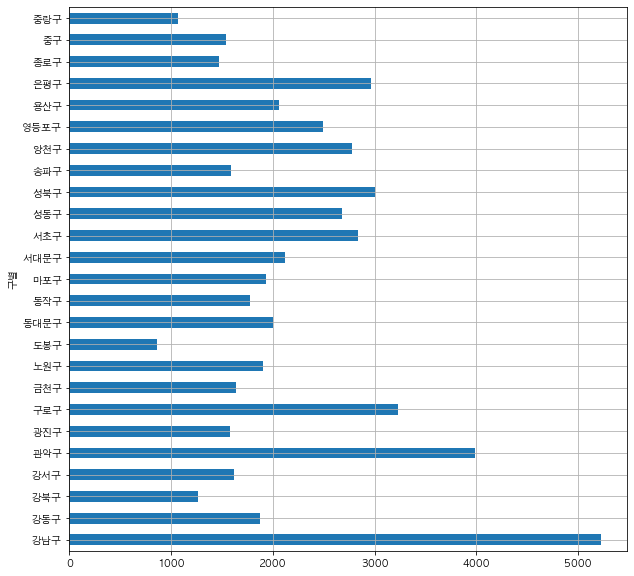

In [54]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10))
plt.show()

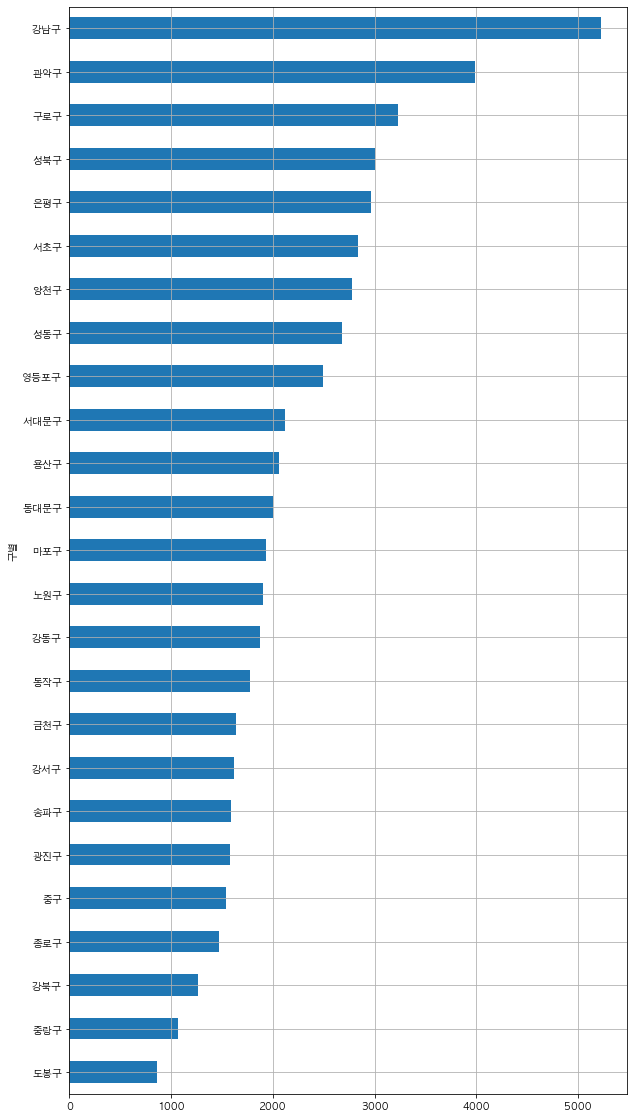

In [55]:
data_result["소계"].sort_values().plot(kind="barh", grid=True, figsize=(10, 20))
plt.show()

인구수 대비 CCTV 비율을 계산해서 정렬한 그래프 그리기

In [56]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100

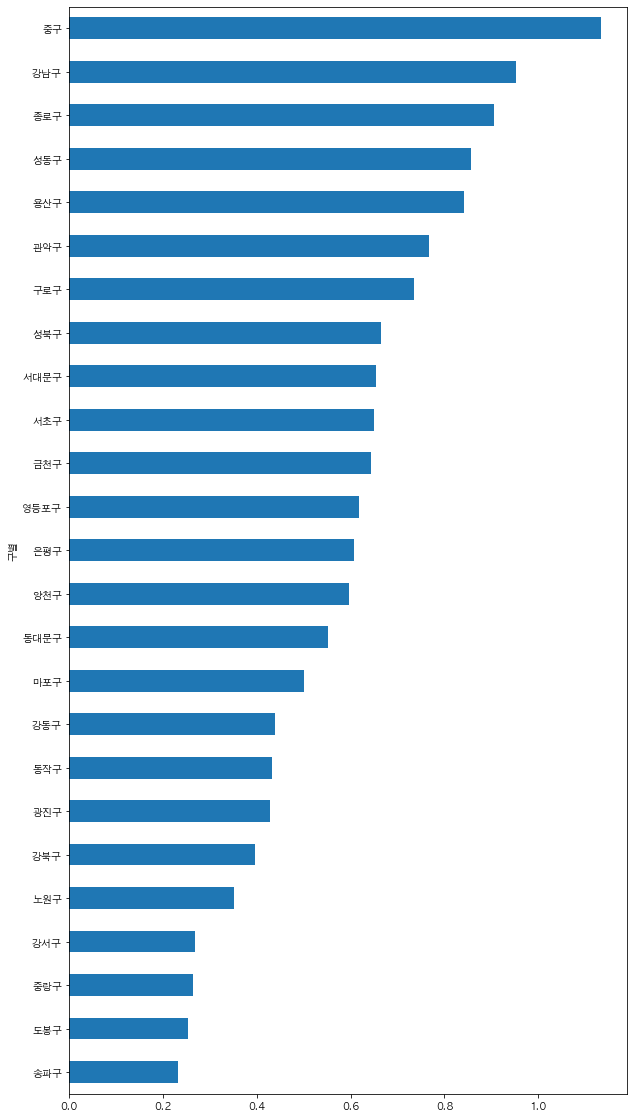

In [57]:
data_result["CCTV비율"].sort_values().plot(kind="barh", gid=True, figsize=(10, 20))
plt.show()

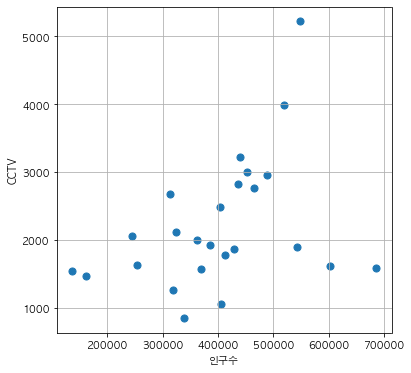

In [58]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

CCTV와 인구수는 양의 상관관계가 있다고 봤기 때문에 위 그래프에 대표하는 직선 하나를 그려본다.  

In [59]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([2.82277056e-03, 1.08591762e+03])

In [60]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

`numpy`의 `polyfit` 명령으로 직선을 그릴 수 있다.  
x축과 y축 데이터를 얻어야 하는데, x축은 `linspace`로 만들고, y축은 `poly1d`로 만든다. 

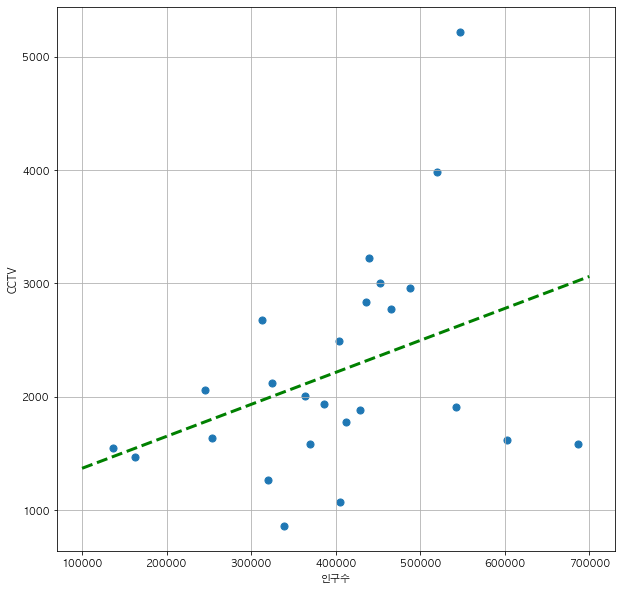

In [62]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

이 직선이 전체 데이터의 대표 값 역할을 한다면, 그 경향에서 멀리 있는 구는 이름이 표시 되도록 해보자

In [63]:
data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"]))

df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221.0,52.171379,547602,542498,5104,69011,0.932064,12.602401,0.953430,2589.327575
송파구,1586.0,62.833676,686181,679247,6934,84740,1.010521,12.349511,0.231134,1436.849146
관악구,3985.0,99.150425,519864,502089,17775,73693,3.419163,14.175438,0.766547,1431.625585
도봉구,858.0,66.601942,339001,336698,2303,57367,0.679349,16.922369,0.253097,1184.839664
강서구,1617.0,77.887789,602230,595602,6628,81965,1.100576,13.610249,0.268502,1168.874735


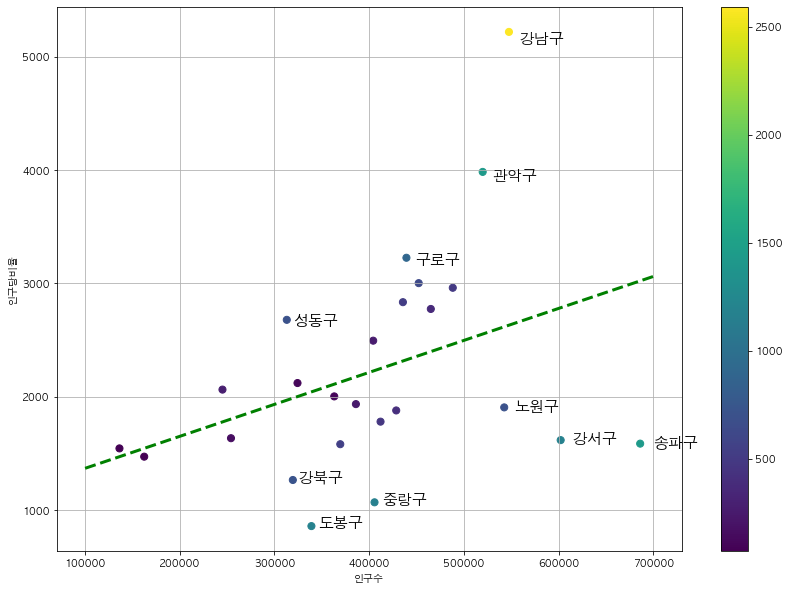

In [65]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result["인구수"], data_result["소계"], c=data_result["오차"], s=50)
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")

for n in range(10):
    plt.text(df_sort["인구수"][n] * 1.02, df_sort["소계"][n] * 0.98, df_sort.index[n], fontsize=15)
    
plt.xlabel("인구수")
plt.ylabel("인구당비율")

plt.colorbar()
plt.grid()
plt.show()